In [1]:
from pyimagesearch.centroidtracker import CentroidTracker
from imutils.video import VideoStream
import numpy as np
import cv2
import imutils
import time
from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5l')
import matplotlib
matplotlib.use('Agg')
model.classes = [0, 2]  # person and car

# Image
# img = cv2.imread('/home/dotronghiep/Documents/Research/Simple-object-tracking-with-OpenCV/cars_and_persons.jpeg')
img = cv2.imread('/home/dotronghiep/Documents/Datasets/Car_tracking/JVB/0_1.png')

# Inference
results = model(img)
# results.print()  # or .show(), .save()

Using cache found in /home/dotronghiep/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-1-15 Python-3.9.18 torch-2.1.2 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 3902MiB)

Fusing layers... 
YOLOv5l summary: 367 layers, 46533693 parameters, 0 gradients, 109.0 GFLOPs
Adding AutoShape... 


In [15]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,1742.757568,439.541504,1842.257080,580.635559,0.795706,2,car
1,79.055862,482.951172,123.808472,592.961182,0.788555,2,car
2,1197.099243,367.450867,1231.519287,469.680298,0.766903,0,person
3,585.311523,324.771851,630.024048,435.951355,0.716087,0,person
4,1037.959473,232.833527,1145.031860,301.837189,0.686380,2,car
5,1128.174805,303.122437,1292.541748,424.460144,0.655413,2,car
6,629.123901,302.369446,765.844238,441.710510,0.599212,2,car
7,382.572083,331.987976,510.322937,460.139282,0.531550,2,car
8,1126.934814,222.527863,1230.530396,306.404724,0.501343,2,car
9,836.456299,294.212646,964.850586,389.532776,0.493737,2,car


In [16]:
detections = results.pred[0].detach().cpu().numpy()

In [37]:
for i in range(0, detections.shape[0]):
    if detections[i, 5] == 2:
        if detections[i, 4] > 0:
            box = detections[i, 0:4] 
            print(box)
            rect = box.astype("int")
            print("dfasdgasfg", rect)
            # (startX, startY, endX, endY) = box.astype("int")
            # cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)
    if detections[i, 5] == 0:
        if detections[i, 4] > 0:
            box = detections[i, 0:4] 
            rect = box.astype("int")


[     1742.8      439.54      1842.3      580.64]
dfasdgasfg [1742  439 1842  580]
[     79.056      482.95      123.81      592.96]
dfasdgasfg [ 79 482 123 592]
[       1038      232.83        1145      301.84]
dfasdgasfg [1037  232 1145  301]
[     1128.2      303.12      1292.5      424.46]
dfasdgasfg [1128  303 1292  424]
[     629.12      302.37      765.84      441.71]
dfasdgasfg [629 302 765 441]
[     382.57      331.99      510.32      460.14]
dfasdgasfg [382 331 510 460]
[     1126.9      222.53      1230.5       306.4]
dfasdgasfg [1126  222 1230  306]
[     836.46      294.21      964.85      389.53]
dfasdgasfg [836 294 964 389]
[     840.24      228.51      933.96      317.83]
dfasdgasfg [840 228 933 317]
[     994.13      285.18        1126      414.61]
dfasdgasfg [ 994  285 1125  414]
[     1267.3       293.1      1425.1      428.13]
dfasdgasfg [1267  293 1425  428]
[     954.15      211.28      1049.3      301.73]
dfasdgasfg [ 954  211 1049  301]
[     1294.2         245

In [17]:
for i in range(0, detections.shape[0]):
    # print(detections[i, 5])
    if detections[i, 5] == 0:
        print(detections[i, 4])
        if detections[i, 4] > 0.5:
            box = detections[i, 0:4] 
            print(box)
            (startX, startY, endX, endY) = box.astype("int")
            cv2.rectangle(img, (startX, startY), (endX, endY), (0, 255, 0), 2)
    if detections[i, 5] == 2:
        print(detections[i, 4])
        if detections[i, 4] > 0.5:
            box = detections[i, 0:4] 
            (startX, startY, endX, endY) = box.astype("int")
            cv2.rectangle(img, (startX, startY), (endX, endY), (255, 0, 0), 2)

0.79570645
0.7885548
0.7669033
[     1197.1      367.45      1231.5      469.68]
0.7160873
[     585.31      324.77      630.02      435.95]
0.6863798
0.6554134
0.5992124
0.53155
0.50134337
0.4937368
0.4882576
0.4480982
0.4307017
0.40012696
0.3837891
0.37919042
0.35431716
0.32136568
0.32116473
0.31676057


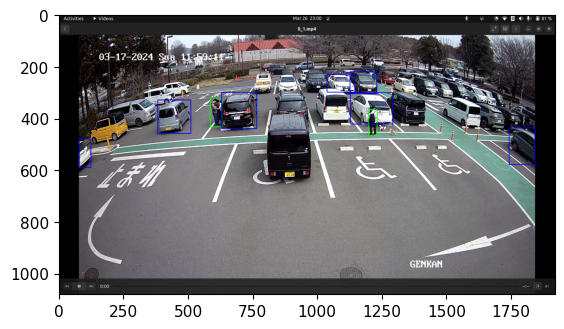

In [18]:
matplotlib.use('module://ipykernel.pylab.backend_inline')
plt.imshow(img[:,:,::-1])

In [5]:
import slots as sl
import pandas as pd
import numpy as np

screen_width, screen_height = 1280, 640

df = pd.read_csv('./centroid_coordinates/cam1.csv')
df = df.drop(columns=[df.columns[0], df.columns[-1]])
columns = np.array(df.columns)
values = df.values.squeeze()
slots = []
for column, value in zip(columns, values):
    if column[0] == 'x':
        x = int(value*screen_width)
    else:
        y = int(value*screen_height)
        name = column[-2:]
        slot = sl.Slot(name, x, y)
        slots.append(slot)
        # print(slot.id)
print(len(slots))

20


In [6]:
def distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def find_nearest_coordinate(point, coordinates):
    # Tìm tọa độ có khoảng cách gần nhất
    x, y = point
    nearest_coord = min(coordinates, key=lambda coord: distance(x, y, coord[0], coord[1]))
    return nearest_coord

def centroid_in_polygon(centroid, polygon):
    # Chuyển đổi các điểm của đa giác thành kiểu numpy array
    polygon = np.array(polygon, np.int32)
    centroid = tuple(float(x) for x in centroid)
    # Sử dụng hàm pointPolygonTest để kiểm tra
    result = cv2.pointPolygonTest(polygon, centroid, False)

    if result >= 0:
        return True
    else:
        return False

def show_results(img, results, polygon):
    # Lấy tọa độ trung tâm của các slot trống
    slot_centroids = []
    for slot in slots:
        slot_ID = slot.id
        slot_centroids.append([slot.x, slot.y])
    slot_centroids = np.array(slot_centroids)

    for box in results[0].boxes:
        # print(box.conf.cpu().item())
        # print(np.array(box.xyxy.cpu(), dtype=int).squeeze())
        left, top, right, bottom = np.array(box.xyxy.cpu(), dtype=int).squeeze()
        width = right - left
        height = bottom - top
        center = (left + int((right-left)/2), top + int((bottom-top)/2))
        centroid = (center[0], center[1] + height//4)
        
        # Lấy tên lớp của bounding box
        label = results[0].names[int(box.cls)]
        confidence = float(box.conf.cpu())
        # Chọn màu dựa trên lớp
        if int(box.cls) == 0 and confidence>=0.2:  # Lớp person
            color = (0, 0, 255)  # Màu đỏ
            # Vẽ bounding box và chú thích
            # cv2.rectangle(img, (left, top), (right, bottom), color, 2)
        elif centroid_in_polygon(centroid, polygon) == True:
        # else:
            nearest_slot = find_nearest_coordinate(centroid, slot_centroids)
            cv2.line(img, centroid, nearest_slot, (0, 0, 255), 1)
            color = (0, 255, 0)  # Màu xanh
            cv2.circle(img, centroid, 3, color, -1)
            cv2.rectangle(img, (left, top), (right, bottom), color, 2)

        # cv2.putText(img, label, (left, bottom+20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 1, cv2.LINE_AA)

    # Hiển thị hình ảnh
    # plt.imshow(img[:,:,::-1])
    return img


In [10]:
from ultralytics import YOLO
import cv2
import numpy as np

polygon = np.array([[350, 120], [800, 90], [1280, 390], [1225, 640], [0, 610], [80, 340]], np.int32)

vs = cv2.VideoCapture('/home/dotronghiep/Documents/JVBCompany/car_tracking_JVB/short_video/camD/camD3.mp4')
rest = -1
model = YOLO('yolov9c.pt')  # pretrained YOLOv8n model
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('D_4.mp4', fourcc, 30.0, (screen_width, screen_height))
while vs.isOpened():
    rest += 1
    ret, frame = vs.read()
    if ret==True :
        frame = cv2.resize(frame, (screen_width, screen_height))
        # cv2.polylines(frame, [polygon], isClosed=True, color=0, thickness=2)
        # # Tạo lớp màu xám đục
        # gray_mask = np.full((screen_height, screen_width), 128, dtype=np.uint8)

        # # Sử dụng fillPoly để tạo vùng đục dựa trên đa giác
        # cv2.fillPoly(gray_mask, [polygon], color=0)
        for i in slots:
            cv2.circle(frame, (i.x, i.y), 4, (255, 0, 0), -1)
        if rest % 5 == 0:
            results = model(frame, conf=0.2) 
            # classes=[0,2,5,7,67]
        img = show_results(frame, results, polygon)
        out.write(frame)
        cv2.imshow("Frame", frame)   
        key = cv2.waitKey(1) & 0xFF
        if key == ord('q'):
            break    
    else:
        break
vs.release()
out.release()
cv2.destroyAllWindows()


OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



0: 320x640 1 person, 23 cars, 2 trucks, 111.5ms
Speed: 2.2ms preprocess, 111.5ms inference, 87.2ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 1 person, 23 cars, 2 trucks, 22.9ms
Speed: 1.4ms preprocess, 22.9ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 1 person, 25 cars, 2 trucks, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 1 person, 24 cars, 2 trucks, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 1 person, 25 cars, 1 airplane, 2 trucks, 22.4ms
Speed: 0.9ms preprocess, 22.4ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 1 person, 25 cars, 2 trucks, 22.4ms
Speed: 1.3ms preprocess, 22.4ms inference, 0.7ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 1 person, 25 cars, 3 trucks, 22.4ms
Speed: 1.0ms preprocess, 22.4ms inference, 0.8ms postprocess per im

RuntimeError: CUDA error: unspecified launch failure
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


: 

In [2]:
# draw bounding box and save image
import cv2

# Global variables
drawing = False
ix, iy = -1, -1
bbox = []

# Mouse callback function
def draw_bbox(event, x, y, flags, param):
    global ix, iy, drawing, bbox

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
        bbox.clear()  # Clear previous bounding box (if any)
        bbox.append((ix, iy))

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            bbox.clear()  # Clear previous bounding box (if any)
            bbox.append((ix, iy))  # Starting point of the bounding box
            bbox.append((x, y))    # Current mouse position
            # Draw bounding box on a copy of the original image (to not modify the original)
            temp_img = image.copy()
            cv2.rectangle(temp_img, bbox[0], bbox[1], (0, 255, 0), 2)
            cv2.imshow('image', temp_img)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        # Draw bounding box on the original image (to not modify the original)
        cv2.rectangle(image, bbox[0], bbox[1], (0, 255, 0), 2)
        cv2.imshow('image', image)
        cv2.imwrite('image_with_bbox2.jpg', image)  # Save image with bounding box

# Load the image
image = cv2.imread('/home/dotronghiep/Downloads/1_1.png')

# Create a window and bind the mouse callback function
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_bbox)

# Display the image
cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


IndexError: list index out of range